# Project 7: Working with Personal Data

# Part 1: Extracting timestamps from your personal data

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Uploading the json file with my data to a dataframe:
df_my_music = pd.read_json("StreamingHistory_music_0.json")

In [113]:
# Extracting only the timestamps from my data, and then turning that new dataframe into a csv file:
df_my_timestamps = df_my_music['endTime']
timestamps_Adrianna = df_my_timestamps.to_csv('timestamps_Adrianna')

In [114]:
# Downloading this new data set back to my computer to send to Ilina:
from google.colab import files
files.download("timestamps_Adrianna.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Part 2: Analyzing timestamp data for patterns

In [115]:
#First reading the data to get a sense of what it looks like:
df_timestamps = pd.read_csv('timestamps_Ilina')
df_timestamps['endTime']

,endTime
0,2024-04-04 23:06
1,2024-04-04 23:08
2,2024-04-04 23:11
3,2024-04-04 23:11
4,2024-04-04 23:14
...,...
3015,2025-03-28 20:14
3016,2025-03-28 20:15
3017,2025-03-28 20:15
3018,2025-03-28 20:15


In [116]:
# 1. Formatting the data in datetime
# 2. Making a new column that finds the time between a given timestamp and the previous one
# 3. Making two new columns that find the longest and average time between timestamps, respectively
# Finally, displaying the dataframe again with the new columns
df_timestamps['endTime'] = pd.to_datetime(df_timestamps['endTime'])
df_timestamps['diff'] = df_timestamps['endTime'].diff()
df_timestamps['max_diff'] = df_timestamps['diff'].max()
df_timestamps['ave_diff'] = df_timestamps['diff'].mean()
df_timestamps

,Unnamed: 0,endTime,diff,max_diff,ave_diff
0,0,2024-04-04 23:06:00,NaT,39 days 01:28:00,0 days 02:50:42.172904935
1,1,2024-04-04 23:08:00,0 days 00:02:00,39 days 01:28:00,0 days 02:50:42.172904935
2,2,2024-04-04 23:11:00,0 days 00:03:00,39 days 01:28:00,0 days 02:50:42.172904935
3,3,2024-04-04 23:11:00,0 days 00:00:00,39 days 01:28:00,0 days 02:50:42.172904935
4,4,2024-04-04 23:14:00,0 days 00:03:00,39 days 01:28:00,0 days 02:50:42.172904935
...,...,...,...,...,...
3015,3015,2025-03-28 20:14:00,0 days 18:55:00,39 days 01:28:00,0 days 02:50:42.172904935
3016,3016,2025-03-28 20:15:00,0 days 00:01:00,39 days 01:28:00,0 days 02:50:42.172904935
3017,3017,2025-03-28 20:15:00,0 days 00:00:00,39 days 01:28:00,0 days 02:50:42.172904935
3018,3018,2025-03-28 20:15:00,0 days 00:00:00,39 days 01:28:00,0 days 02:50:42.172904935


In [117]:
# 4.1. Finding the date with the most timestamps:
most_day_timestamps = df_timestamps['endTime'].dt.date.value_counts().idxmax()
print('The date with the most timestamps is', most_day_timestamps)

The date with the most timestamps is 2024-09-19


In [118]:
# 4.2. Finding the number of timestamps on the date found in the above cell:
most_day_number = df_timestamps['endTime'].dt.date.value_counts().max()
print('The number of timestamps on 2024-09-19 is', most_day_number)

The number of timestamps on 2024-09-19 is 104


In [119]:
# 5.1. Finding the month with with most timestamps:
most_month_timestamps = df_timestamps['endTime'].dt.month.value_counts().idxmax()
print('The month with the most timestamps is the '+str(most_month_timestamps)+'th, September')

The month with the most timestamps is the 9th, September


In [120]:
# 5.2. Finding the number of timestamps in September:
most_month_number = df_timestamps['endTime'].dt.month.value_counts().max()
print('the number of timestamps in September is', most_month_number)

the number of timestamps in September is 599


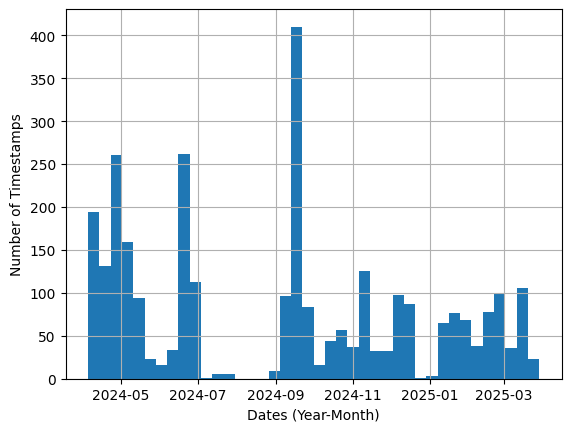

In [121]:
# 6. Creating a visualization of the timestamps data:
df_timestamps["endTime"].hist(bins=40)
plt.xlabel('Dates (Year-Month)')
plt.ylabel('Number of Timestamps')
plt.show()

The above visualization shows that in mid 2024 a lot of timestamps with a couple of high peaks and one low dip. Between July and September of 2024 there is a gap in the data, where barely any timestamps show up. Then in September the timestamps skyrocket in number, before balancing out again over the following months. It seems as though on average there are fewer tmestamps between October of 2024 and March of 2025 than between April and July of 2024. The data showing the month with the most timestamps is very easily confirmed with this visualization, although an assumtion has to be made that the day with the most timestamps is also in there.

7) I believe that the source of this data is probably a music streaming platform. It's possible that it is also a podcast platform, but from my brief overview it seems like the timestamps are very close together, usually within a few minutes of each other on the same day, which definitely is not enough elapsed time for podcasts. Additionally, the column name of the data I analyzed, "endTime," was the same as mine, down to the formatting. I would hazard a guess that this data was also downloaded from Spotify like mine, but I also do not know if other music platforms use the same name or format.

8) The data I got from my partner about my data was that the day with the most daily timestamps was May 14, 2024, with 174 timestamps, and that same month of May had the most monthly with 1140 timestamps. Listening to her go over her analysis of my data seemed pretty accurate, and after talking we both said that we deduced the other one downloaded data from a music platform based on the column name, as well as the frequent timestamps. After asking, we did in fact both download from Spotify.



9) Given that the date and month that Ilina told me had the most timestamps for me was was right around finals week last year, I wouldn't be surprised if I was either playing a lot of study music, or playing a lot of loud, energetic music to stay awake as I worked on assigments late at night. I'm not sure whether the portion about other data is refering to other data within this timestamp file, or if this is a hypothetical about what other types of data could be collected to answer this question. For the first option, I think the histogram is a great way of telling when approximately someone was listening to the most music; the only thing to be cautious of that I learned in this project is that having too few bins over generalizes the results, meaning that one month could seem to be the one with the highest number of timestamps, but in reality it is the cumulative timestamps from the end and beginning of adjacent months, for example.

# Part 3: Make a combined visualization

In [122]:
# Reading in Ilina's data
ilina_timestamps = pd.read_csv("/content/timestamps_Ilina")
ilina_timestamps.head()

,Unnamed: 0,endTime
0,0,2024-04-04 23:06
1,1,2024-04-04 23:08
2,2,2024-04-04 23:11
3,3,2024-04-04 23:11
4,4,2024-04-04 23:14


In [123]:
# Reading in Adrianna's data
adrianna_timestamps = pd.read_csv("/content/timestamps_Adrianna.csv")
adrianna_timestamps.head()

,Unnamed: 0,endTime
0,0,2024-04-05 00:00
1,1,2024-04-05 06:45
2,2,2024-04-05 06:48
3,3,2024-04-05 06:52
4,4,2024-04-05 06:52


In [124]:
# Converting the data:
ilina_timestamps['endTime'] = pd.to_datetime(ilina_timestamps['endTime'])
adrianna_timestamps['endTime'] = pd.to_datetime(adrianna_timestamps['endTime'])

In [125]:
# Create a new column for date (without time):
ilina_timestamps['date'] = ilina_timestamps['endTime'].dt.date
adrianna_timestamps['date'] = adrianna_timestamps['endTime'].dt.date

In [126]:
# Group by date and count events for each partner:
ilina_counts = ilina_timestamps.groupby('date')['endTime'].count().reset_index()
adrianna_counts = adrianna_timestamps.groupby('date')['endTime'].count().reset_index()

In [127]:
# Group by date and count events for each partner:
ilina_counts = ilina_timestamps.groupby('date')['endTime'].count().reset_index()
adrianna_counts = adrianna_timestamps.groupby('date')['endTime'].count().reset_index()

In [128]:
# Rename 'endTime' column to 'count' for better clarity:
ilina_counts.rename(columns={'endTime': 'count'}, inplace=True)
adrianna_counts.rename(columns={'endTime': 'count'}, inplace=True)

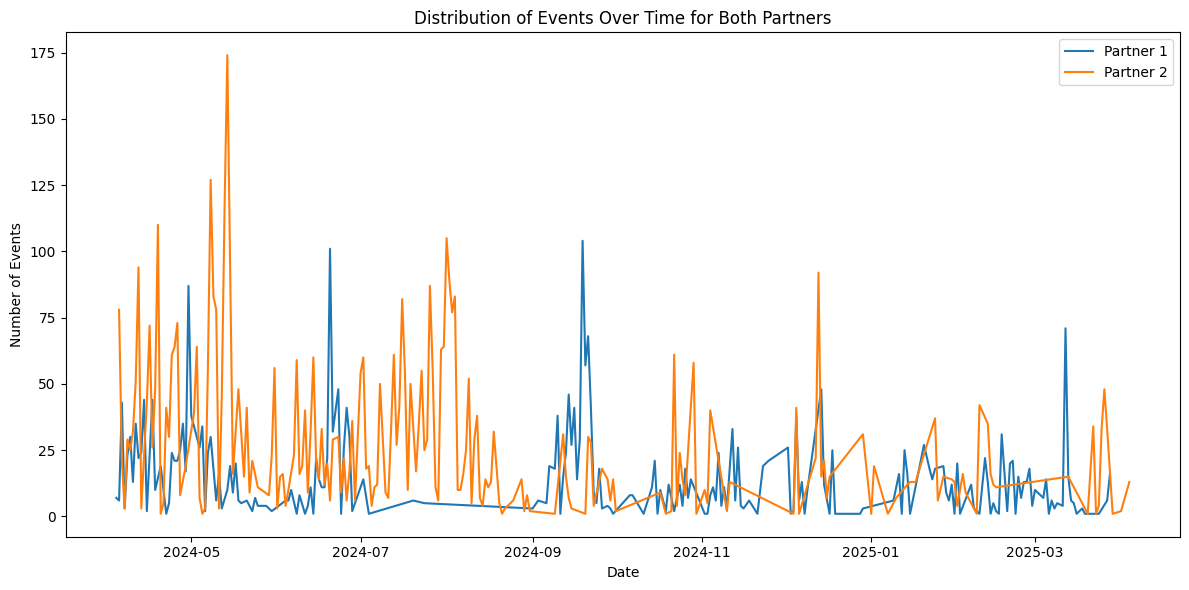

In [129]:
# Create the first visualization:
plt.figure(figsize=(12, 6))
plt.plot(ilina_counts['date'], ilina_counts['count'], label='Partner 1')
plt.plot(adrianna_counts['date'], adrianna_counts['count'], label='Partner 2')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Distribution of Events Over Time for Both Partners')
plt.legend()

plt.tight_layout()
plt.show()

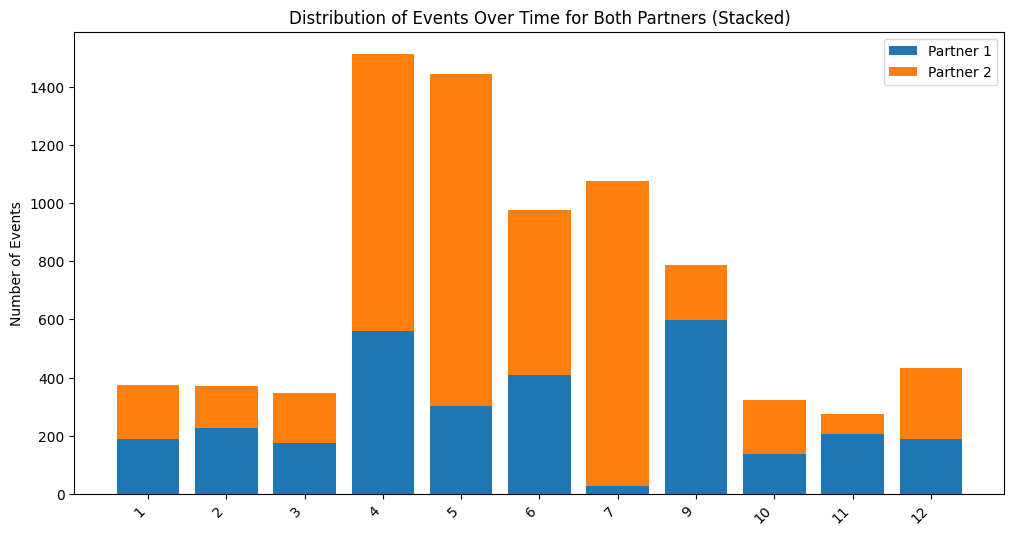

In [130]:
#Create the second visualization:
# 1. Extract the month from the 'date' column and create a new 'month' column
ilina_counts['month'] = pd.to_datetime(ilina_counts['date']).dt.month
adrianna_counts['month'] = pd.to_datetime(adrianna_counts['date']).dt.month

# 2. Group by month and sum the counts for each partner
# Rename the column first before grouping to avoid the error.
ilina_counts.rename(columns={'endTime': 'count'}, inplace=True)
adrianna_counts.rename(columns={'endTime': 'count'}, inplace=True)

ilina_counts = ilina_counts.groupby('month')['count'].sum().reset_index()
adrianna_counts = adrianna_counts.groupby('month')['count'].sum().reset_index()

# 3. Merge the dataframes
merged_counts = pd.merge(ilina_counts, adrianna_counts, on='month', suffixes=('_partner1', '_partner2'))

# 4. Create the stacked bar chart
width = 0.8  # the width of the bars
indices = np.arange(len(merged_counts['month']))  # the x locations for the groups
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(indices, merged_counts['count_partner1'], width, label='Partner 1')
ax.bar(indices, merged_counts['count_partner2'], width, bottom=merged_counts['count_partner1'], label='Partner 2')  # Stack on top

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Events')
ax.set_title('Distribution of Events Over Time for Both Partners (Stacked)')
ax.set_xticks(indices)
ax.set_xticklabels(merged_counts['month'], rotation=45, ha='right')
ax.legend()

plt.show()

Looking at these two visualizations, the first thing that strikes me that I didn't notice from looking at just my own data is that in many of the places where my listening peaks (I have more timestamps), Ilina's listening dips (has fewer timestamps), and vice versa. It is also interesting seeing the amount of timestamps from each person in comparison.

# Part 4: Analyze and visualize an additional element from  your personal data

A) Question 1: which artist have I listened to the most?
  I ran code that created a variable  from analysing the column of artist names in my data set using the base code df[ ].value_counts().idxmax(). The result was The Crane Wives, which makes sense because they are my favorite band.

B) Question 2: which song from The Crane Wives have I listened to the most, and how many times did I listen to it?
  To find this answer I first made a dataset for just songs by The Crane Wives in my data set. Then I found the most frequently repeated song name with the base code df[ ].value_counts().idxmax(), which was Ribs, and the number of times it was played using df[ ].value_counts().max(), which turned out to be 41 times.

C) Making the visualization of when I listened to Ribs distributed over the time period contained within this dataset.
  First I had to make another dataframe, this one dedicated only to the song Ribs. Then I used that to create a histogram, which I took a screenshot of and inserted below. The reason I chose to screenshot is because the instructions said not to show the code, but then the histogram would not load properly without the previous code.
  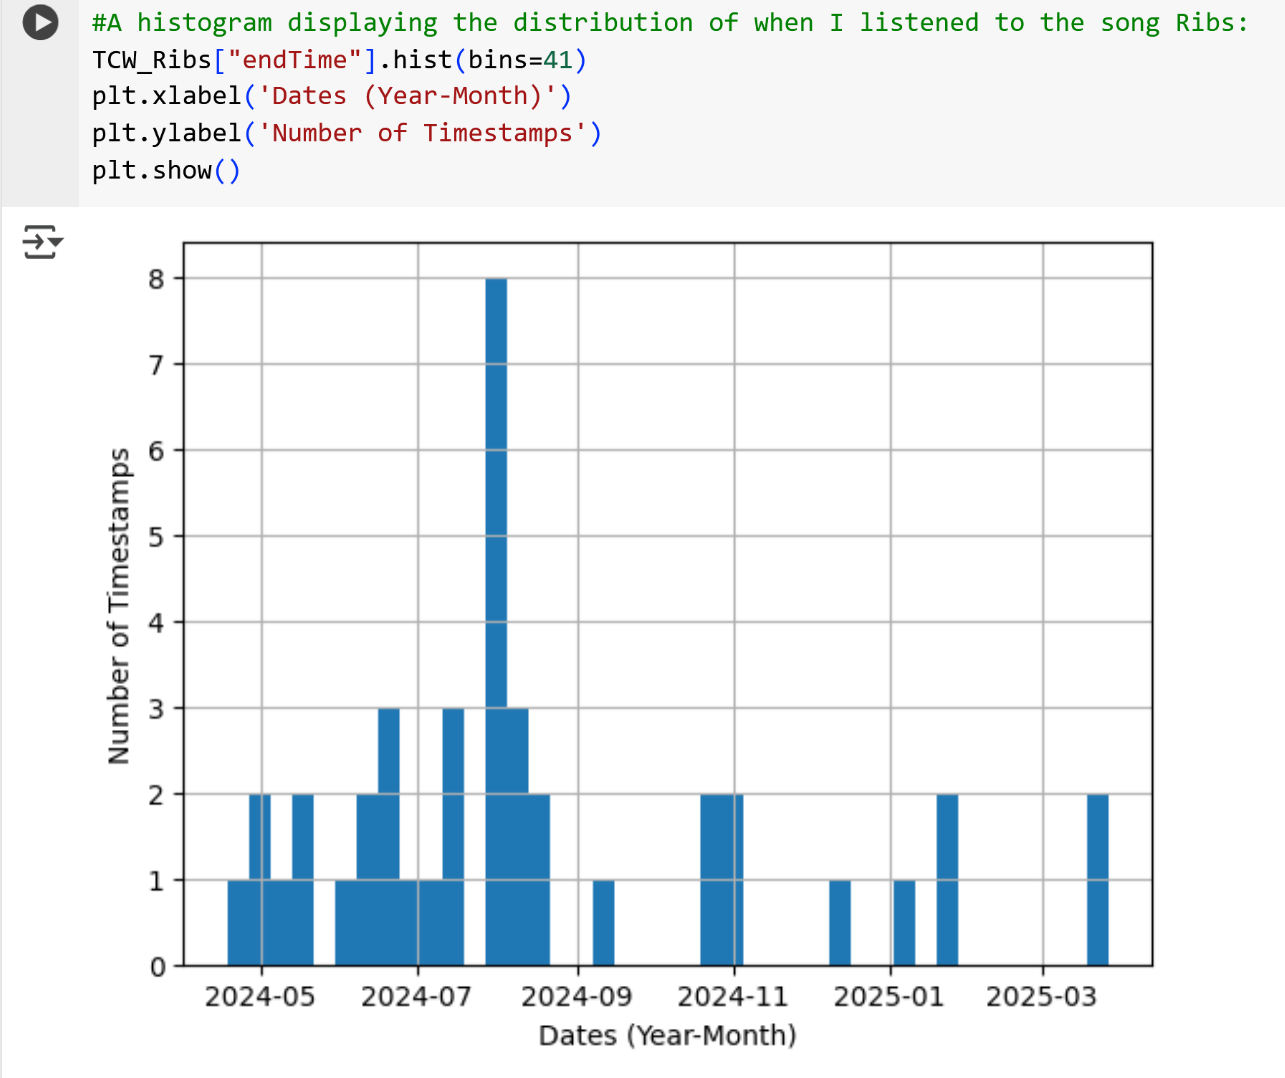